# NBA Shooting Data

## Introduction
### Basketball is a game that relies on precision, strategy, and athleticism, and one of the most important aspects that can significantly impact a team's success is shooting performance. In this project, we examine the shooting statistics of four professional NBA players during the 2021 NBA Playoffs. The dataset, sourced from [NBA-website](https://www.nba.com/stats/players/shooting/?Season=2020-21&SeasonType=Playoffs&PerMode=Totals)., provides a comprehensive overview of the shots taken by these players, allowing us to examine various aspects of their shooting performance and on-court preferences.
## Background
### Shooting skill is a key factor in determining a player's overall contribution to the team. Understanding players' shooting patterns and tendencies can help coaches develop effective game plans, optimize player rotations, and strategically position defenders. The 2021 NBA Playoffs will be the perfect snapshot for analysis, capturing the big moments of the competition as players show off their skills under intense pressure.

## Data Description
**Our dataset is composed by :**
|variable |class     |description                                                  |
|:--------|:---------|:------------------------------------------------------------|
|SHOOTER  |String    |Name of the player taking the shot                           |
|X        |float     |Horizontal distance of the shot taken from the basket in ft  |
|Y        |float     |Vertical distance of the shot taken from the basket in ft    |
|RANGE    |String    |Radius range of the shot taken from the basket in ft         |
|DEFENDER |String    |Name of the player defending the shot                        |
|SCORE    |String    |'MADE' if shot is scored, else 'MISSED'                      |

## Research questions:
+ #### What is the average shooting percentage among the 4 professional players? And which player is more consistent in shooting?
+ #### What is the best shooting position for each of the 4 players?
+ #### What is the worst shooting position for each of the 4 players?
+ #### If you were the coach, on whom of the four players would you put your best defender? 
+ #### Is there a correlation between the efficiency of a shooter and the position where he shoots?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
color=sns.color_palette()

In [5]:
data = pd.read_csv("./nba_players_shooting.csv", index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 775
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SHOOTER   776 non-null    object 
 1   X         776 non-null    float64
 2   Y         776 non-null    float64
 3   RANGE     776 non-null    object 
 4   DEFENDER  776 non-null    object 
 5   SCORE     776 non-null    object 
dtypes: float64(2), object(4)
memory usage: 42.4+ KB


## OBSERVATION

+ The data set have a total of 776 observations and 6 columns.

+ There is no missing value.

# OUR ANALYSIS STARTS HERE
## Exploratory Data Analysis (EDA)
### The dataset is not huge, we can easily get to know it and decide how to tackle some interesting questions. From the introductory code above we know:

+ #### SHOOTER and DEFENDER are categorical variables taking 4 values (the four player names)
+ #### RANGE is also categorical containing 6 bins
+ #### SCORE is binary
+ #### X and Y are numerical continuous variables
## 1. What is the average shooting percentage among the 4 professional players?
### To begin this analysis, we will first identify the players that are in our data set, and their different performance.

In [6]:
data.SHOOTER.value_counts()

SHOOTER
Trae Young           329
Chris Paul           216
Seth Curry           147
Russell Westbrook     84
Name: count, dtype: int64

In [7]:
score_made = ((data.SHOOTER[data.SCORE == "MADE"].value_counts()/data.SHOOTER.value_counts())*100).round(2)
score_made

SHOOTER
Trae Young           43.16
Chris Paul           48.61
Seth Curry           57.82
Russell Westbrook    33.33
Name: count, dtype: float64

In [8]:
score_missed = ((data.SHOOTER[data.SCORE == "MISSED"].value_counts()/data.SHOOTER.value_counts())*100).round(2)
score_missed

SHOOTER
Trae Young           56.84
Chris Paul           51.39
Seth Curry           42.18
Russell Westbrook    66.67
Name: count, dtype: float64

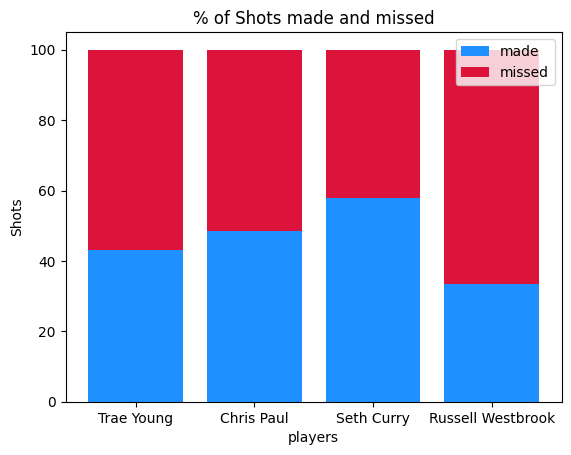

In [9]:
plt.bar(score_made.index, score_made.values, color='dodgerblue')
plt.bar(score_missed.index, score_missed.values, bottom=score_made.values, color='crimson')
plt.xlabel("players")
plt.ylabel("Shots")
plt.legend(["made", "missed"])
plt.title("% of Shots made and missed")
plt.show()

## Findings
### The four players that compose our dataset are:

+ Trae Young, with 329 shots. 43% were made while 57% were missed.
+ Chris Paul, with 216 shots. 49% were made while 51% were missed.
+ Seth Curry, with 147 shots. 58% were made while 42% were missed.
+ and Russell Westbrook, with 84 shots. 33% were made while 67% were missed.
### Therefore, from this dataset, Curry has more percent of made shots, however the consistent player is Chris Paul as he attempted more shots that Curry(69) and has a good accuracy. And, also from this dataset, we can witness that 46% of shots were made while 54% were missed.

## But let's dig deeper
## 2. What is the best shooting position for each of the 4 players?
### Let's visualize the positions from where the successful shots were made for each player and see any patterns. The X and Y variables are coordinates on the field, so a scatter plot is very convenient in this case. Imagine the basket being at the bottom center, at position 0:0.

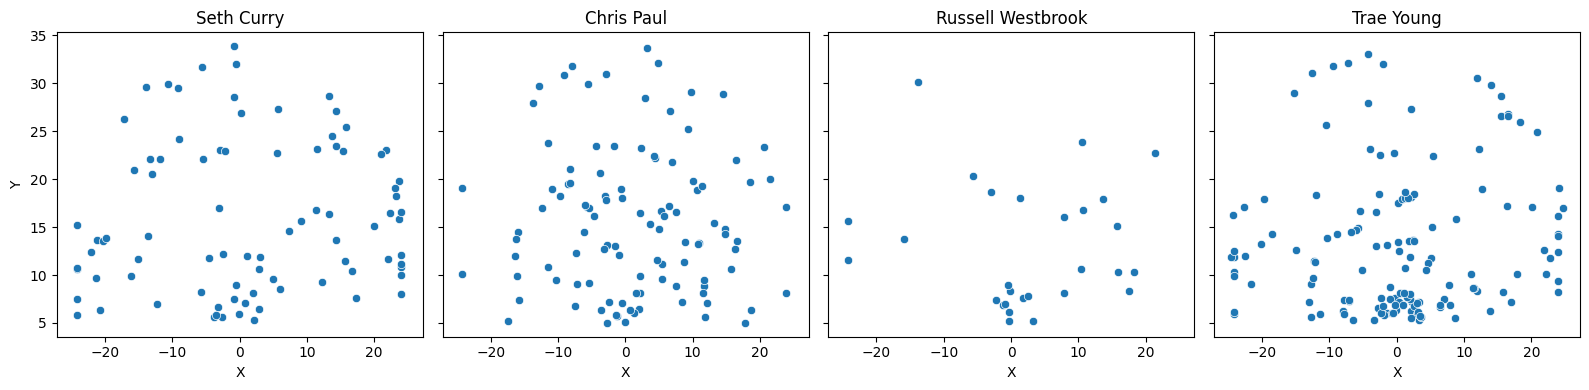

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True, sharex=True)

for i, shooter in enumerate(data.SHOOTER.unique()):
   
    shooter_data = data.query("SHOOTER == @shooter & SCORE == 'MADE'")

   
    sns.scatterplot(data=shooter_data, x='X', y='Y', ax=ax[i])

   
    ax[i].set_title(shooter)


plt.tight_layout()  
plt.show()

## OK, we can almost see some patterns here: 
### Young mostly scores in the lower part of the court near the basket (with Y < 15 feet), while Curry scores from all over; Paul seems to avoid the flanks and shoots in front of the basket (with X between 20 feet to the left and right of the basket). Westbrook... well, he's not one to score much! When he decides to shoot, he must be near the basket.

## 3. What is the worst shooting position for each of the 4 players?

## But...
### We didn't actually count missed shots. Perhaps, with a clear illustration, we can notice some trends or positions in which players are more likely to miss. Let's look at Curry's chart. Even though he scores from all over the court, perhaps a particular position is less suitable for him to score, so we can write to him on Instagram Direct that it is better for him to pass while he is in a "unlucky" position for him.


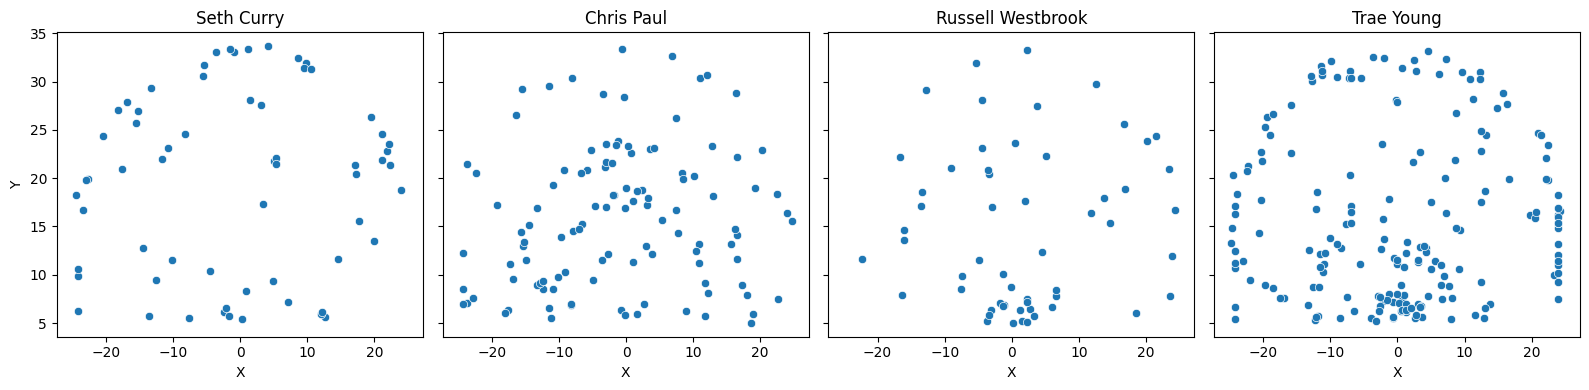

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True, sharex=True)

for i, shooter in enumerate(data.SHOOTER.unique()):
    
    shooter_data = data.query("SHOOTER == @shooter & SCORE == 'MISSED'")

    
    sns.scatterplot(data=shooter_data, x='X', y='Y', ax=ax[i])

   
    ax[i].set_title(shooter)


plt.tight_layout() 
plt.show()

## Yes, now we can write Curry's Instagram Direct
### As you can see, the left side of the court is less suitable for Curry to score, where he made the most misses. And it's not because he tried most of his shots from the left side, from the "MADE" graph we can witness that he hit most of his shots from the right side. While, Paul doesn't seem to avoid flanks as we claimed before. He simply misses from the flanks, especially from the left side of the court. Young misses lots of shots beyond the 3p line, especially left side is unlucky for him. So as we claimed before, he better attempt from the lower part of the court near the basket (with Y < 15 feet). Westbrook... again well, he misses lots of shots under the basket, but scores most of the shots also from this position.


### However, these scatter plots were not very helpful, there is no obvious clustering of exactly successful shots. Let's do some feature engineering by separating the court in three regions, the area within 9 feet of the basket, the area from 9 feet to the 3-pointer line (at 23.9 feet), and the area beyond the 3-pointer; a new variable RANGE_region will hold that info, and we validate the new variable by sampling 10 shots. 
## Finally, all shots in the dataset are shown appropriately colored to visualize the regions:


,SHOOTER,X,Y,RANGE,DEFENDER,SCORE,RANGE_num,RANGE_region
INDEX,,,,,,,,
236,Chris Paul,1.087910,17.668297,"(10, 14)",Trae Young,MISSED,17.701759,Within 3p line
256,Chris Paul,-17.446405,5.244970,"(15, 19)",Trae Young,MADE,18.217760,Within 3p line
570,Trae Young,2.517026,18.441695,"(10, 14)",Seth Curry,MADE,18.612672,Within 3p line
296,Chris Paul,18.649455,5.051619,"(15, 19)",Russell Westbrook,MISSED,19.321517,Within 3p line
96,Seth Curry,-24.232052,15.209513,"(25, 29)",Trae Young,MADE,28.609817,Beyond 3p line
22,Seth Curry,-4.587841,11.745743,"(5, 9)",Trae Young,MADE,12.609947,Within 3p line
15,Seth Curry,0.840828,8.330373,"(0, 4)",Russell Westbrook,MISSED,8.372700,Under basket
616,Trae Young,-8.446056,12.810089,"(10, 14)",Russell Westbrook,MISSED,15.343867,Within 3p line
502,Trae Young,-0.674661,5.667838,"(0, 4)",Russell Westbrook,MISSED,5.707851,Under basket


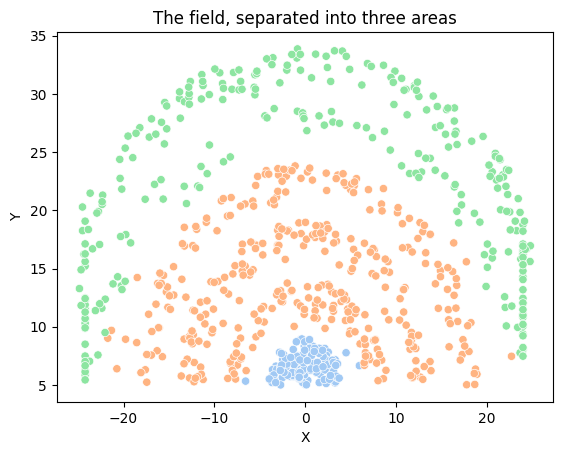

In [12]:
data['RANGE_num'] = np.sqrt(data.X**2 + data.Y**2)
data['RANGE_region'] = np.select(
    [
        data.RANGE_num > 23.9,
        data.RANGE_num > 9,
    ],
    [
        'Beyond 3p line',
        'Within 3p line',
    ],
    default='Under basket'
)

data['RANGE_region'] = data['RANGE_region'].astype("category").cat.reorder_categories(['Under basket', 'Within 3p line', 'Beyond 3p line'], ordered=True)

sns.scatterplot(x=data.X, y=data.Y, hue=data.RANGE_region, legend=False, palette='pastel')
plt.title("The field, separated into three areas")

data.sample(10)


## Is there a correlation between the efficiency of a shooter and the position where he shoots?

### Now we can group the data by SHOOTER and see each player's field goal percentage by area. The darker the color, the higher the percentage of successful shots in that region:

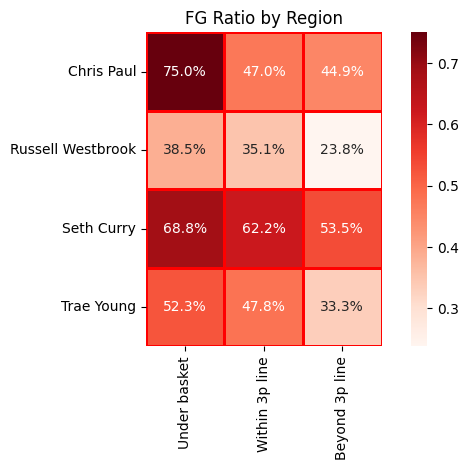

In [13]:
# Replacing 'MADE' and 'MISSED' with 1 and 0 using map
data['SCORE'] = data['SCORE'].map({'MADE': 1, 'MISSED': 0}).infer_objects(copy=False)

fg_ratio_by_region = data.groupby(['SHOOTER', 'RANGE_region'], observed=False).SCORE.mean().unstack()

sns.heatmap(fg_ratio_by_region, cmap='Reds', square=True, annot=True, linecolor='red', linewidths=1, fmt='.1%')

plt.xlabel(None)
plt.ylabel(None)
plt.title("FG Ratio by Region")

plt.tight_layout()

plt.show()


## The best shooting position for each of the 4 players:

+ #### Chris Paul, Trae Young & Seth Curry are better off shooting under the basket, especially Paul's is insane in comparison with other players.
+ #### Curry is efficient when shooting from the second area compared to other players.
+ #### Westbrook is not so good compared to other players, but the best positions for him are to attempt under basket and within 3p line.
## The worst position for each of the 4 players:
+ #### As we remember in the graph earlier, Young's accuracy beyond the 3p line was terrible, but we could only see the coordination of misses from the court above, and there is a good illustration there with statistics that support our prediction and say that the accuracy behind the 3p line is only 33.3%, which is close to Westbrook.
+ #### Curry and Chris are not so good in shooting compared to their closer positions, but in comparison with other players, their accuracy is better.
+ #### Westbrook is honestly bad from every position, especially behind the 3p line. But he has no problem being a good player on the court, and we will find out further.

## 4. If you were the coach, on whom of the four players would you put your best defender?
### The best defender is the player that blocks most of the shots made against him. Similarly to what we did above for the best shooter, we will group by the DEFENDER variable and calculate the ratio of missed shots this time, instead of made.

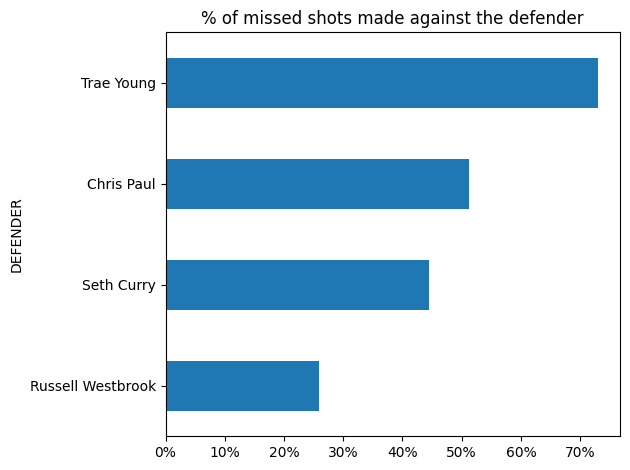

In [14]:
( data
.replace(['MADE','MISSED'],[0,1]) 
.groupby('DEFENDER')             
.SCORE                            
.mean()                           
.sort_values()                    
.plot.barh()                      
)
plt.gca().xaxis.set_major_formatter(mtick. PercentFormatter(1))
plt.title("% of missed shots made against the defender");
plt.tight_layout()
plt.show()

### So, we see that Russell Westbrook is the best defender, as more than 70% of the shots made against him were misses. And if I were the coach, Westbrook absolutely would take the defending position.
### Therefore, it is very good that we didn't focus only on goals and added defense side of the basketball. After all, Westbrook would be upset reading this project if we didn't include the defense. (Young better to wait the pass under the basket)

## 5. Is there a correlation between the efficiency of a shooter and the player who is defending him?
### The efficiency of a shooter is different for each defender that comes up against him. To answer this question we have to compare the ratios of successful shots for each pair of SHOOTER and DEFENDER.

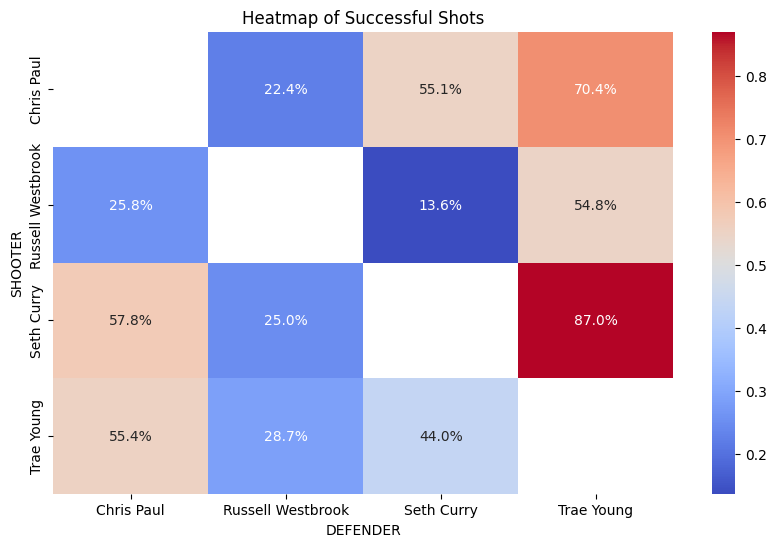

In [15]:
heatmap_data = (
    data.replace(['MADE', 'MISSED'], [1, 0])
    .groupby(['SHOOTER', 'DEFENDER'])
    .SCORE
    .mean()
    .unstack()
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1%')
plt.title('Heatmap of Successful Shots')
plt.show()

### From the table we can easily see that all players are very efficient (the darker blue cells) when shooting against Trae Young, while Trae scores best when facing Chris Paul. So, the answer is yes, there is a correleation, the efficiency of shooters is much higher when facing specific defenders. We can also notice that Westbrook was effective against three players who are blue on the heat map, which proves that he is a defender.
## Now, let's try to take this a bit further and see exactly how each pair behaves: 
### Does the shooter prefer long or close shots, and does he score the shot? For each pair, the shots will be shown according to range from basket:

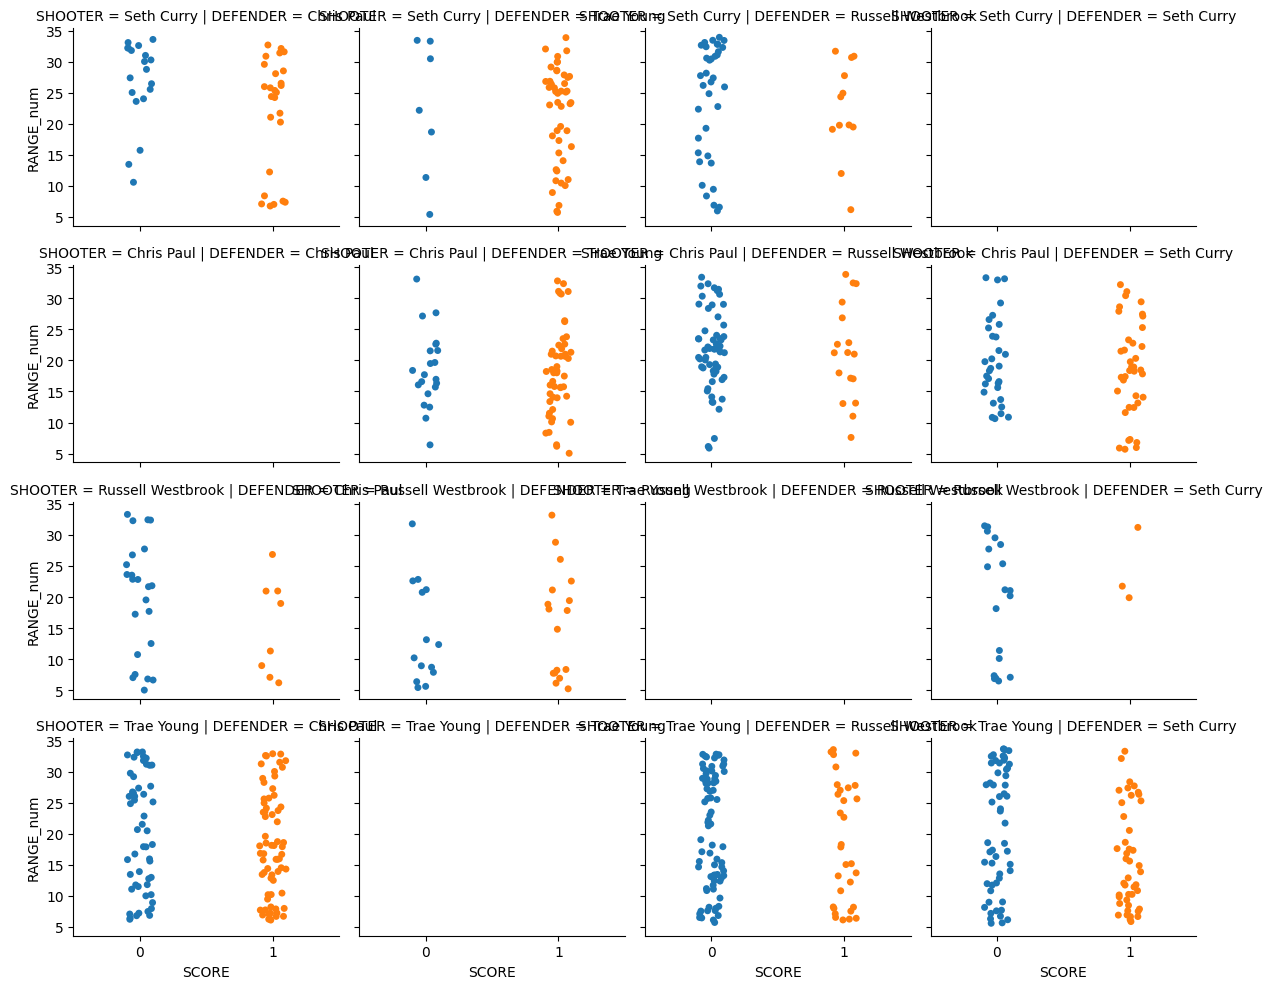

In [16]:
sns.catplot(
    data=data,
    y='RANGE_num',
    x='SCORE',
    col='DEFENDER',
    row='SHOOTER',
    kind='strip',
    hue='SCORE',  
    legend=False,  
    aspect=1.2,
    height=2.5
)

plt.show()

## OK, first of all we can validate the results of the previous table with the shooter efficiencies: for example, it is clear that Westbrook cannot score against Curry and his efficiency was 13.6% in the table. What other insights do we get?

+ ### When Curry faces Paul he prefers to shoot from long range, there are very few shots below 15 feet
+ ### Westbrook defends very well against Young in rong range (there are many missed dots in the upper area of their plot)
+ ### Against Paul, Westbrook is better at defending in middle ranges (the missed dots are in the middle)
+ ### Curry does not defend at all against Paul at close ranges, below 8 feet
+ ### It's better for Westbrook to not try shooting when facing Paul, as he will mostly likely miss the shot

# Conclusion:
## 1. Conclusion of each player:
+ #### In our opinion, Seth Curry is an amazing player to have on the roster, he is a great shooter with a top level accuracy. And he doesn't have any specific position where he can dominate his opponents, in general he is consistent in every position that is more valuable.
+ #### Chris Paul is good at playing under the basket which is his favorite position and has a pretty good level of accuracy. He is also one of the players who can't play on the flanks, although he tries to do a lot of times. So, he needs to train more shooting from flanks. 
+ #### Trae Young is a player who a lot of people struggle to say if he is a good player to have on your team, he has an amazing scoring ability, he can shoot from nearly every place on the court, but his defensive side really needs to improve, because if it doesn't the Atlanta Hawks will have a hard time trying to get the NBA title.
+ #### Russell Westbrook's defensive ability is really good as he was better in every defensive metric. But we can't say the same about his shooting ability, however to be honest he didn't try to throw too much(84) and that's normal for a defender considering the fact that he's a monster defensively.



## 2. Best and worst offensive and defensive players:
#### Looking at the offensive team, Trae Young is the point guard with the most points at 331, which means he has 96 more points than the second point guard. This significant difference in performance is also due to the fact that Trae throws much more than other players: while Trae made 329 throws, Chris Paul came in second with 216 throws. It's interesting to note that even though Trae made over 100 more shots than Chris Paul, he remained ahead of Chris by only 64 points, this data shows us that Chris has better accuracy than Trae. 
#### So in conclusion, our opinion for the best offensive player is Chris Paul because even thought he is not the one who has the best accuracy or the most points, he is the one who balances these two assets better. And the best defensive player is Westbrook clearly showing in the data that he dominated his opponents.